#라이브러리 호출

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

# 데이터 호출

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
x = iris.data
y = iris.target

In [5]:
x.shape, y.shape

((150, 4), (150,))

# 데이터 분리

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3,random_state=2022)

In [7]:
x_train = pd.DataFrame(x_train,columns=iris.feature_names)
x_val = pd.DataFrame(x_val,columns=iris.feature_names)

In [8]:
x_train_s = x_train[['sepal length (cm)','sepal width (cm)']]
x_train_p = x_train[['petal length (cm)','petal width (cm)']]

x_val_s = x_val[['sepal length (cm)','sepal width (cm)']]
x_val_p = x_val[['petal length (cm)','petal width (cm)']]

#데이터 전처리

In [9]:
n_class = len(np.unique(y_train))

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,n_class)
y_val = to_categorical(y_val,n_class)

# 모델링

## Add Layer

In [11]:
#레이어 선언
il_s = keras.layers.Input((2,))
h1_s = keras.layers.Dense(64,'relu')(il_s)

il_p = keras.layers.Input((2,))
h1_p = keras.layers.Dense(64,'relu')(il_p)

add_l = keras.layers.Add()([h1_s, h1_p])

ol = keras.layers.Dense(n_class,'softmax')(add_l)

#모델 선언
model = keras.models.Model([il_s,il_p],ol)

#모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#모델 확인
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           192         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           192         ['input_2[0][0]']                
                                                                                              

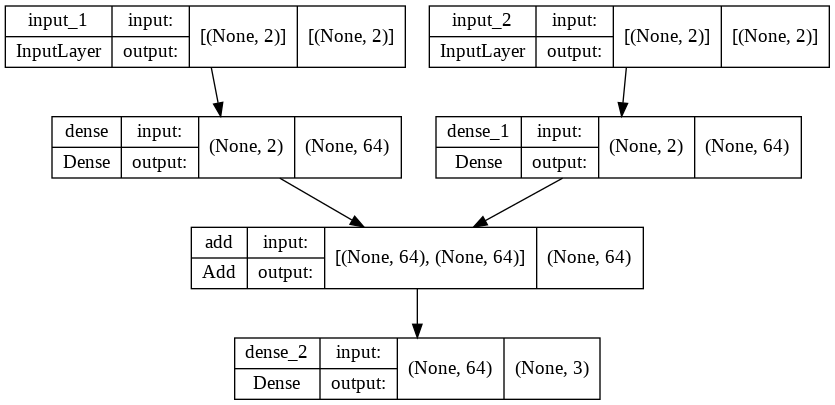

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [13]:
model.fit([x_train_s,x_train_p],y_train,
          epochs=100,
          verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 1.1848 - accuracy: 0.3810
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0021 - accuracy: 0.6095
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9025 - accuracy: 0.5429
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8944 - accuracy: 0.6190
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8889 - accuracy: 0.6095
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8678 - accuracy: 0.5238
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8457 - accuracy: 0.5333
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8299 - accuracy: 0.6762
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8082 - accuracy: 0.6476
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7957 - accuracy: 0.5143
Epoch 11/100
4/4 [===========

## Concatenate Layer

In [14]:
#레이어 선언
il_s = keras.layers.Input((2,))
h1_s = keras.layers.Dense(64,'relu')(il_s)

il_p = keras.layers.Input((2,))
h1_p = keras.layers.Dense(64,'relu')(il_p)

con_l = keras.layers.Concatenate()([h1_s, h1_p])

ol = keras.layers.Dense(n_class,'softmax')(con_l)

#모델 선언
model = keras.models.Model([il_s,il_p],ol)

#모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#모델 확인
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 64)           192         ['input_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 64)           192         ['input_4[0][0]']                
                                                                                            

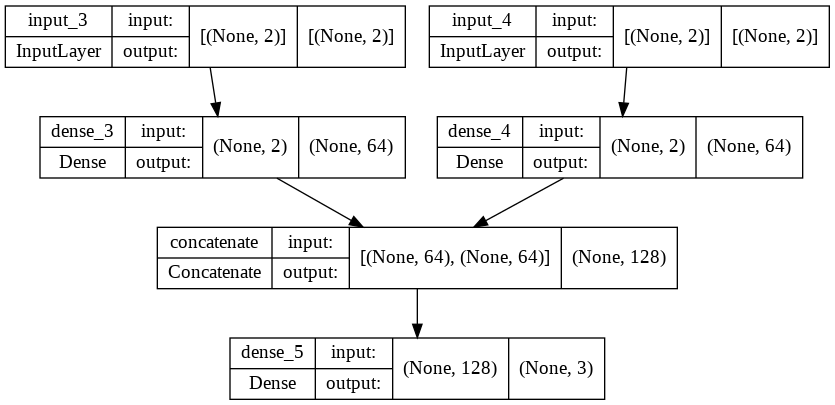

In [15]:
plot_model(model,show_shapes=True)

In [16]:
model.fit([x_train_s,x_train_p],y_train,
          epochs=100,
          verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1953 - accuracy: 0.3238
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1451 - accuracy: 0.3238
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1053 - accuracy: 0.3238
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0683 - accuracy: 0.3238
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0327 - accuracy: 0.3238
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0007 - accuracy: 0.3238
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9699 - accuracy: 0.4190
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9424 - accuracy: 0.8000
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9129 - accuracy: 0.7143
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8854 - accuracy: 0.6667
Epoch 11/100
4/4 [===========

## Subtract Layer

In [17]:
#레이어 선언
il_s = keras.layers.Input((2,))
h1_s = keras.layers.Dense(64,'relu')(il_s)

il_p = keras.layers.Input((2,))
h1_p = keras.layers.Dense(64,'relu')(il_p)

sub_l = keras.layers.Subtract()([h1_s, h1_p])

ol = keras.layers.Dense(n_class,'softmax')(sub_l)

#모델 선언
model = keras.models.Model([il_s,il_p],ol)

#모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#모델 확인
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 64)           192         ['input_5[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 64)           192         ['input_6[0][0]']                
                                                                                            

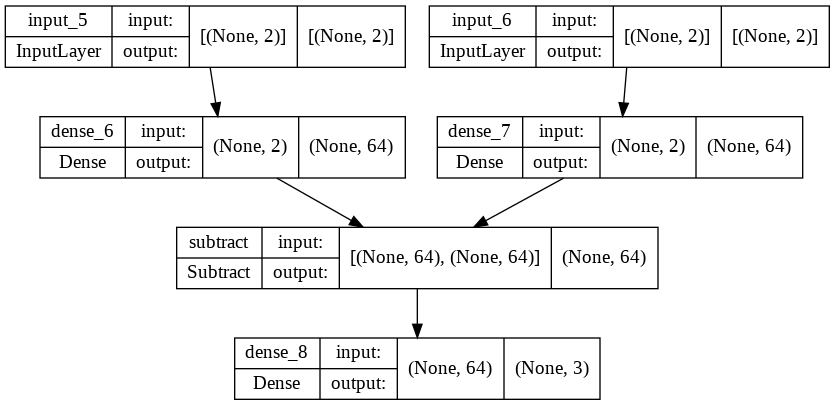

In [18]:
plot_model(model,show_shapes=True)

## Average Layer

In [19]:
#레이어 선언
il_s = keras.layers.Input((2,))
h1_s = keras.layers.Dense(64,'relu')(il_s)

il_p = keras.layers.Input((2,))
h1_p = keras.layers.Dense(64,'relu')(il_p)

avg_l = keras.layers.Average()([h1_s, h1_p])

ol = keras.layers.Dense(n_class,'softmax')(avg_l)

#모델 선언
model = keras.models.Model([il_s,il_p],ol)

#모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#모델 확인
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 64)           192         ['input_7[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 64)           192         ['input_8[0][0]']                
                                                                                            

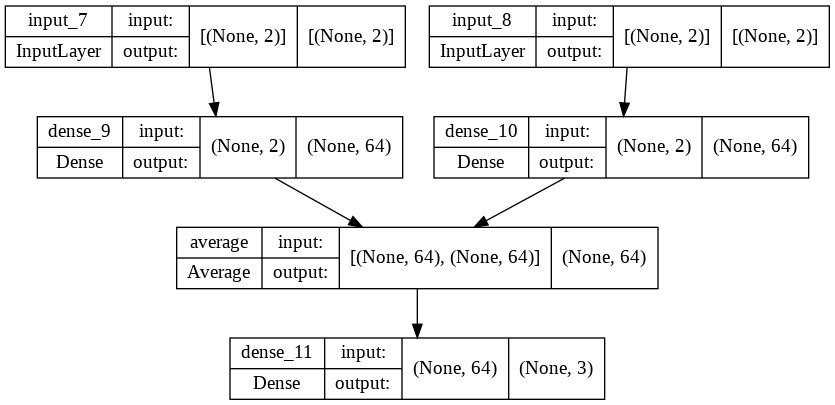

In [20]:
plot_model(model,show_shapes=True)